In [ ]:

#Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Ruta archivo CSV
ruta_archivo = r"C:\Users\Tokyotech\Desktop\weas u\Infra\Tarea 3\Dataset\creditcard.csv"

In [ ]:
#Archivo CSV en un DataFrame de Pandas
try:
    df = pd.read_csv(ruta_archivo)
    print("Archivo CSV leído correctamente.")
except FileNotFoundError:
    print(f"Error: El archivo '{ruta_archivo}' no se encuentra.")
except Exception as e:
    print(f"Error al leer el archivo CSV: {e}")
    df = None  

Archivo CSV leído correctamente.


In [ ]:
if df is not None:  #Se verifica que df se haya cargado correctamente
    #Mostramos las primeras filas del DataFrame
    print("Primeras 5 filas:")
    print(df.head())  # O df.head(10) para mostrar las primeras 10 filas

    #Mostramos las últimas filas del DataFrame
    print("\nÚltimas 5 filas:")
    print(df.tail())

    #Información sobre las columnas, tipos de datos y valores nulos
    print("\nInformación del DataFrame:")
    print(df.info())

    #Estadísticas descriptivas de las columnas numéricas
    print("\nEstadísticas descriptivas:")
    print(df.describe())

    #Contamos la cantidad de valores nulos en cada columna
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

    #Contamos la cantidad de filas duplicadas
    print("\nFilas duplicadas:")
    print(df.duplicated().sum())

Primeras 5 filas:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26   

In [ ]:
#Eliminar Filas duplicadas.
print(f"Tamaño del DataFrame antes de eliminar duplicados: {len(df)}")
df = df.drop_duplicates()
print(f"Tamaño del DataFrame después de eliminar duplicados: {len(df)}")

#Verificamos que se hayan eliminado los duplicados
print(f"Cantidad de filas duplicadas restantes: {df.duplicated().sum()}") 

Tamaño del DataFrame antes de eliminar duplicados: 284807
Tamaño del DataFrame después de eliminar duplicados: 283726
Cantidad de filas duplicadas restantes: 0


In [ ]:
#Mostrar la distribución de las clases (DESPUÉS de eliminar duplicados)
num_fraudes = df['Class'].value_counts()[1] if 1 in df['Class'].value_counts() else 0# Cuenta los '1'
num_no_fraudes = df['Class'].value_counts()[0] if 0 in df['Class'].value_counts() else 0# Cuenta los '0'
total_transacciones = len(df)

print(f"Total de transacciones (después de eliminar duplicados): {total_transacciones}")
print(f"Transacciones fraudulentas (Class=1): {num_fraudes} ({num_fraudes / total_transacciones * 100:.2f}%)")
print(f"Transacciones no fraudulentas (Class=0): {num_no_fraudes} ({num_no_fraudes / total_transacciones * 100:.2f}%)")

Total de transacciones (después de eliminar duplicados): 283726
Transacciones fraudulentas (Class=1): 473 (0.17%)
Transacciones no fraudulentas (Class=0): 283253 (99.83%)


In [ ]:
#Time_Scaled: Escalar ‘Time’ al rango [0, 1] puede ayudar a algunos modelos a converger más rápidamente.
#Hora_Seno y Hora_Coseno: Usar seno y coseno permite al modelo entender que la hora 23:59 está cerca de la hora 00:00. Si solo usáramos la hora como un número (0-23), el modelo no captaría esta relación cíclica.

#Escala 'Time' al rango [0, 1]
df['Time_Scaled'] = df['Time'] / df['Time'].max()

#Extrae la hora del día (en formato cíclico)
df['Hora_Seno'] = np.sin(2 * np.pi * df['Time'] / (60 * 60 * 24))
df['Hora_Coseno'] = np.cos(2 * np.pi * df['Time'] / (60 * 60 * 24))

#Muestra las nuevas columnas
print(df[['Time', 'Time_Scaled', 'Hora_Seno', 'Hora_Coseno']].head())

   Time  Time_Scaled  Hora_Seno  Hora_Coseno
0   0.0     0.000000   0.000000          1.0
1   0.0     0.000000   0.000000          1.0
2   1.0     0.000006   0.000073          1.0
3   1.0     0.000006   0.000073          1.0
4   2.0     0.000012   0.000145          1.0


In [ ]:
#Estadísticas descriptivas de 'Amount'
print(df['Amount'].describe())

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


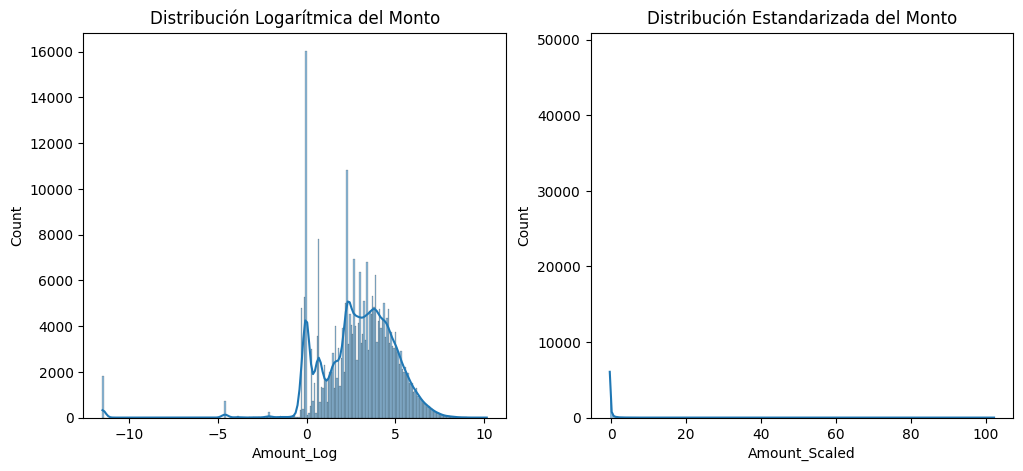

   Amount  Amount_Log  Amount_Scaled
0  149.62    5.008099       0.244200
1    2.69    0.989545      -0.342584
2  378.66    5.936639       1.158900
3  123.50    4.816241       0.139886
4   69.99    4.248353      -0.073813


In [ ]:
#Transformación Logarítmica (para reducir el sesgo)
df['Amount_Log'] = np.log(df['Amount'] + 1e-5)  #Añade un pequeño valor para evitar log(0)

#La transformación logarítmica es muy útil para reducir el sesgo en los datos. np.log(df['Amount'] + 1e-5) aplica el logaritmo natural a cada valor de ‘Amount’, añadiendo un pequeño valor (1e-5) para evitar errores cuando ‘Amount’ es cero.

# Estandarización (para escalar los datos)
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

#La estandarización (usando StandardScaler) escala los datos para que tengan una media de 0 y una desviación estándar de 1. Esto es útil para algoritmos que son sensibles a la escala de las características (como las redes neuronales o los algoritmos basados en distancias).

#Visualizacion de las transformaciones
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Amount_Log'], kde=True)
plt.title('Distribución Logarítmica del Monto')

plt.subplot(1, 2, 2)
sns.histplot(df['Amount_Scaled'], kde=True)
plt.title('Distribución Estandarizada del Monto')

plt.show()

print(df[['Amount', 'Amount_Log', 'Amount_Scaled']].head())

In [ ]:
#Escalar Time
df['Time_Scaled'] = df['Time'] / df['Time'].max()
df['Hora_Seno'] = np.sin(2 * np.pi * df['Time'] / (60 * 60 * 24))
df['Hora_Coseno'] = np.cos(2 * np.pi * df['Time'] / (60 * 60 * 24))

In [ ]:
#Transformacion Amount
df['Amount_Log'] = np.log(df['Amount'] + 1e-5)
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']].values) #Lo pasamos como array para evitar un warning

In [ ]:
#Interacción entre Amount y Time
df['Amount_Time_Interaction'] = df['Amount_Scaled'] * df['Time_Scaled']

#Eliminamos 'Time' (después de usarlo) y 'Amount' original (ya transformado)
df = df.drop(['Time', 'Amount'], axis=1)

In [ ]:
# Dividimos los datos en características (X) y variable objetivo (y)
X = df.drop('Class', axis=1)  # Excluimos 'Class'
y = df['Class']

#Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Escalar de las características (después de la división)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
modelos = {
    "Regresión Logística": LogisticRegression(random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Red Neuronal": MLPClassifier(random_state=42, max_iter=300, early_stopping=True), #Usa early stopping
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Análisis Discriminante Lineal": LinearDiscriminantAnalysis(),
} 


In [ ]:
resultados = {}
resultados_df_lista=[]
for nombre, modelo in modelos.items():
    print(f"Entrenando: {nombre}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]
    reporte_dict = classification_report(y_test, y_pred, output_dict=True) 
    resultados[nombre] = {
        "informe": reporte_dict,
        "auc": roc_auc_score(y_test, y_prob),
        "modelo": modelo
    }

    #Extraemos métricas relevantes (usando la clase fraudulenta '1')
    if '1' in reporte_dict: #Se comprueba si la clase '1' está en el reporte
        precision = reporte_dict['1']['precision']
        recall = reporte_dict['1']['recall']
        f1 = reporte_dict['1']['f1-score']
        support = reporte_dict['1']['support'] #Número de muestras en la clase 1
    else:
        precision, recall, f1, support = 0, 0, 0, 0 # Si no está, usa ceros

    auc = resultados[nombre]['auc']

    #Añadimos los resultados a la lista para el DataFrame
    resultados_df_lista.append([nombre, precision, recall, f1, auc, support])

#Creamos el DataFrame
resultados_df = pd.DataFrame(resultados_df_lista,
                              columns=['Modelo', 'Precisión (Fraude)', 'Recall (Fraude)',
                                       'F1-Score (Fraude)', 'AUC', 'Support (Fraude)'])

#Tabla de resultados
print("\nTabla de Resultados (DataFrame):")
print(resultados_df.to_string(index=False)) #Muestra el DataFrame

Entrenando: Regresión Logística
Entrenando: Random Forest
Entrenando: Red Neuronal
Entrenando: Árbol de Decisión
Entrenando: Análisis Discriminante Lineal

Tabla de Resultados (DataFrame):
                       Modelo  Precisión (Fraude)  Recall (Fraude)  F1-Score (Fraude)      AUC  Support (Fraude)
          Regresión Logística            0.858586         0.598592           0.705394 0.969664             142.0
                Random Forest            0.956140         0.767606           0.851562 0.934554             142.0
                 Red Neuronal            0.867257         0.690141           0.768627 0.949575             142.0
            Árbol de Decisión            0.755725         0.697183           0.725275 0.848403             142.0
Análisis Discriminante Lineal            0.868852         0.746479           0.803030 0.975721             142.0


In [ ]:
#Calculamos el número de fraudes detectados
resultados_df['Fraudes Detectados'] = resultados_df['Recall (Fraude)'] * resultados_df['Support (Fraude)']
resultados_df['Fraudes Detectados'] = resultados_df['Fraudes Detectados'].round().astype(int) #Se redondea al entero más cercano

#Tabla de resultados con la columna agregada
print("\nTabla de Resultados (DataFrame) con Fraudes Detectados:")
print(resultados_df.to_string(index=False))


Tabla de Resultados (DataFrame) con Fraudes Detectados:
                       Modelo  Precisión (Fraude)  Recall (Fraude)  F1-Score (Fraude)      AUC  Support (Fraude)  Fraudes Detectados
          Regresión Logística            0.858586         0.598592           0.705394 0.969664             142.0                  85
                Random Forest            0.956140         0.767606           0.851562 0.934554             142.0                 109
                 Red Neuronal            0.867257         0.690141           0.768627 0.949575             142.0                  98
            Árbol de Decisión            0.755725         0.697183           0.725275 0.848403             142.0                  99
Análisis Discriminante Lineal            0.868852         0.746479           0.803030 0.975721             142.0                 106


In [ ]:
#Resultados:
for nombre, resultado in resultados.items():
    print(f"\nResultados para: {nombre}")
    print(resultado["informe"])
    print(f"AUC: {resultado['auc']:.4f}")


Resultados para: Regresión Logística
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.86      0.60      0.71       142

    accuracy                           1.00     85118
   macro avg       0.93      0.80      0.85     85118
weighted avg       1.00      1.00      1.00     85118

AUC: 0.9697

Resultados para: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.96      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.98      0.88      0.93     85118
weighted avg       1.00      1.00      1.00     85118

AUC: 0.9346

Resultados para: Red Neuronal
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.69      0.77       142

    accuracy                           1.00     85118
   

In [ ]:
resultados_lista = []
for nombre, resultado in resultados.items():
    # Accede al recall de la clase '1' (fraudulenta) usando el entero 1, no la cadena '1'
    try:
        precision_fraude = resultado["informe"][1]['precision']
        recall_fraude = resultado["informe"][1]['recall']
        f1_fraude = resultado["informe"][1]['f1-score']
    except (KeyError, TypeError): #Maneja el caso donde el modelo no tiene resultados para la clase 1
        precision_fraude, recall_fraude, f1_fraude = 0, 0, 0

    auc = resultado['auc']

    resultados_lista.append([nombre, precision_fraude, recall_fraude, f1_fraude, auc])

resultados_df = pd.DataFrame(resultados_lista, columns=['Modelo', 'Precisión (Fraude)', 'Exhaustividad (Fraude)', 'F1-Score (Fraude)', 'AUC'])

C:\Users\Tokyotech\AppData\Local\Temp\ipykernel_16392\2968083734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='AUC', data=resultados_df, palette="viridis")


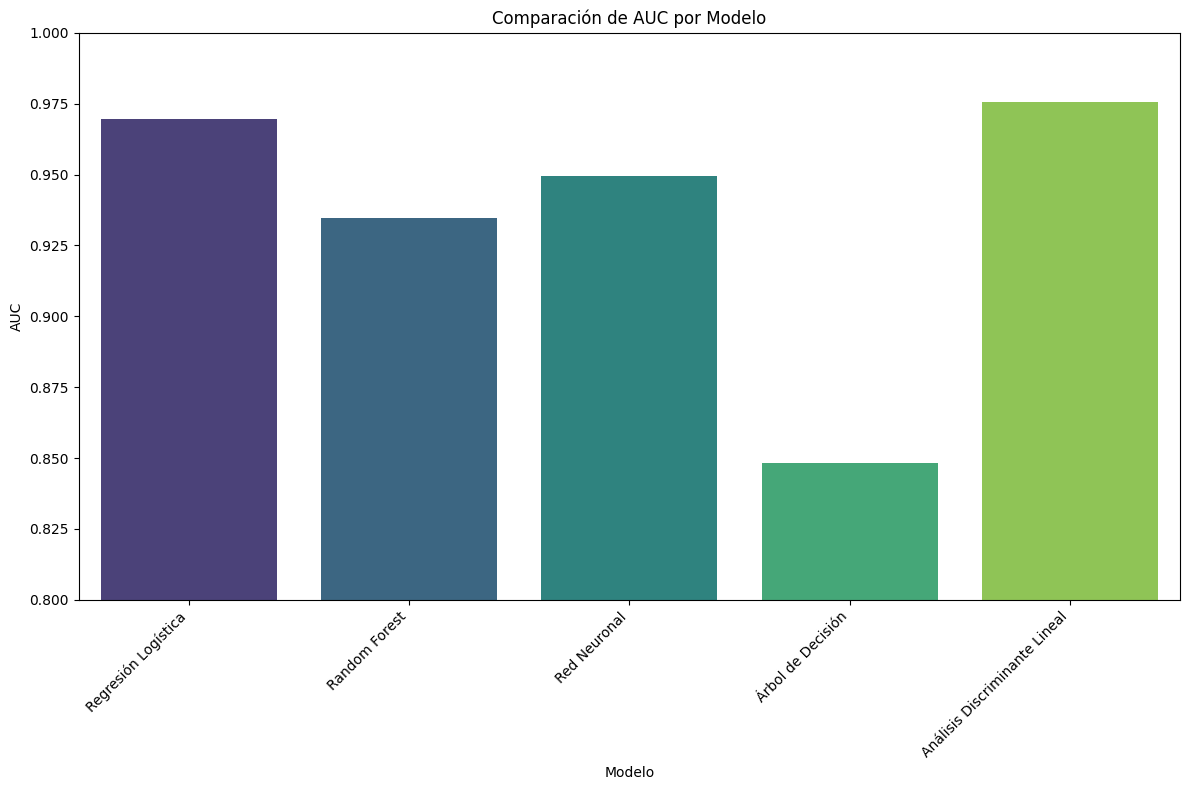

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Modelo', y='AUC', data=resultados_df, palette="viridis")
plt.title('Comparación de AUC por Modelo')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.8, 1.0)  #Ajusta el rango del eje y para enfocarse en las diferencias
plt.tight_layout()
plt.show()
